# Regresión lineal - Implementación

## Formula 

$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2$

In [1]:
# Librerias

import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Datos dummy
m = 100
X = 2 * np.random.random_sample((m, 2)) 
Ytmp = 5 + 2 * X + np.random.random_sample((m, 1))
Y = Ytmp[:,0] + Ytmp[:,1]

In [3]:
# Inicializar

theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()
alpha    = 0.1  # Tasa de aprendizaje 
maxItera = 10000
i        = 0     

#para observar el progreso de los parametros abajo 
log0,log1,log2=np.array([theta0]),np.array([theta1]),np.array([theta2]) 

#para graficar el error cuadratico medio abajo
logE=np.array([])

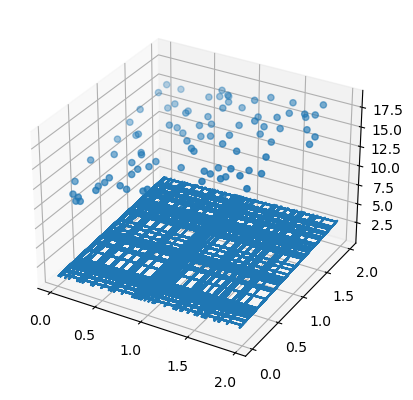

In [4]:
# Graficar datos
fig = plt.figure()
ax  = plt.axes(projection='3d')
x1line = X[:,0]
x2line = X[:,1]
yline  = Y
ax.scatter3D(x1line,x2line,yline)

X1, X2 = np.meshgrid(X[:,0],X[:,1])
Y1 = theta0 + theta1 * X1 + theta2 * X2
ax.plot_wireframe(X1,X2,Y1)
plt.show()

In [5]:
# Ajuste de parámetros - Aprendizaje DG
while i < maxItera:
    # Observar / evaluar
    yF = theta0 + theta1*X[:,0] + theta2 * X[:,1]
    E  = yF - Y
    
    # Actualizar
    nuevaT0 = theta0 - alpha * (1/m) * sum(E)
    nuevaT1 = theta1 - alpha * (1/m) * sum(E * X[:,0])
    nuevaT2 = theta2 - alpha * (1/m) * sum(E * X[:,1])
    
    theta0,theta1,theta2=nuevaT0,nuevaT1,nuevaT2
    log0=np.append(log0,theta0)
    log1=np.append(log1,theta1) 
    log2=np.append(log2,theta2) 
    logE=np.append(logE,sum(E**2)/(2*m))
        
    i+= 1  

In [6]:
[theta0 , theta1, theta2]

[11.010134737302282, 1.9359362581957953, 2.0130925376342357]

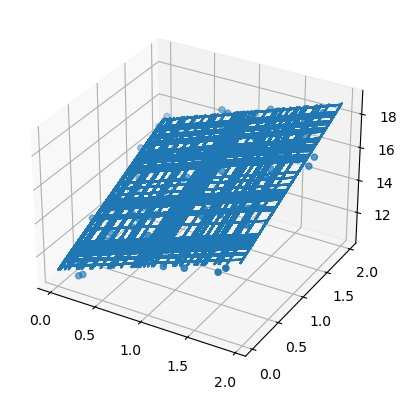

In [7]:
## Graficar nuevamente datos
fig = plt.figure()
ax  = plt.axes(projection='3d')
x1line = X[:,0]
x2line = X[:,1]
yline  = Y
ax.scatter3D(x1line,x2line,yline)

X1, X2 = np.meshgrid(X[:,0],X[:,1])
Y1 = theta0 + theta1 * X1 + theta2 * X2
ax.plot_wireframe(X1,X2,Y1)
plt.show()

In [10]:
i

10000

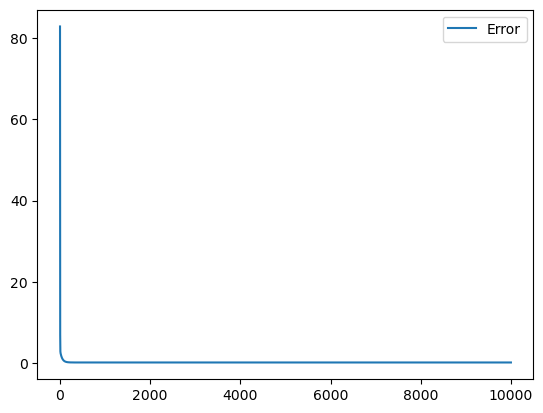

In [8]:
plt.plot(logE, label='Error')
plt.legend()
plt.show()

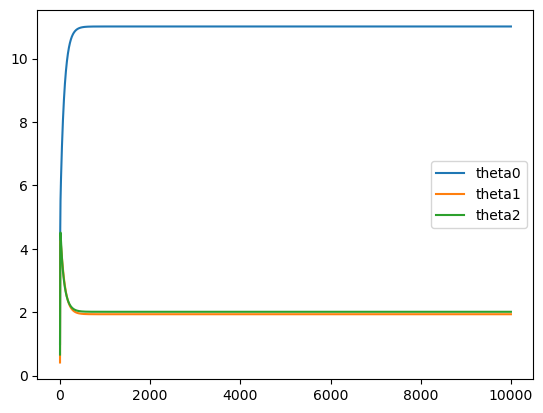

In [9]:
plt.plot(log0, label='theta0')
plt.plot(log1, label='theta1')
plt.plot(log2, label='theta2')
plt.legend()
plt.show()

In [10]:
### Validando con sklearn
from sklearn import linear_model
modeloRL = linear_model.LinearRegression()
modeloRL.fit(X,Y)
##
print(" Modelo Sklearn ")
print("Sklearn intercept_: ", modeloRL.intercept_)
print("Sklearn coef_: ", modeloRL.coef_)

print(" Nuestro Modelo ")
print("theta0 : ",theta0)
print("theta1 : ",theta1)
print("theta2 : ",theta2)

 Modelo Sklearn 
Sklearn intercept_:  11.010134737302344
Sklearn coef_:  [1.93593626 2.01309254]
 Nuestro Modelo 
theta0 :  11.010134737302282
theta1 :  1.9359362581957953
theta2 :  2.0130925376342357


In [11]:
logE[-1]

0.1735197117797407